### **Bagging**

- The term bagging referes to bootstrap aggregating. Bootstrapping is a method of inferring results for a population from results found on a collection of smaller random samples of that population, using replacement during the sampling process. In the context of machine learning, a given set of machine learning model is trained respectively on random samples of training data with replacement, then the combined predictions of each model is aggregated and used as a single prediction. For regression tasks this would mean taking the average of the set of model prediction, and for classification taking the majority vote. 

- **We revist the Breast Cancer Wisconsin data from sklearn to compare bagging with decision trees.**

Load necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

Compare bagging with decision trees

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data[:,:2]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=1)

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=1)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")

tree_clf = DecisionTreeClassifier(max_depth=6, random_state=1)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        80
           1       0.87      0.97      0.92       148

    accuracy                           0.89       228
   macro avg       0.90      0.85      0.87       228
weighted avg       0.89      0.89      0.88       228
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        80
           1       0.91      0.86      0.89       148

    accuracy                           0.86       228
   macro avg       0.84      0.85      0.84       228
weighted avg       0.86      0.86      0.86       228
 



In [3]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=1),
                            n_estimators=500,
                            bootstrap=True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        80
           1       0.88      0.93      0.90       148

    accuracy                           0.87       228
   macro avg       0.87      0.85      0.86       228
weighted avg       0.87      0.87      0.87       228
 



<span style="color: blue;">We can find that the bagging performs as well as a single tree.</span>

Visualize the decision tree boundary and baggind boundary

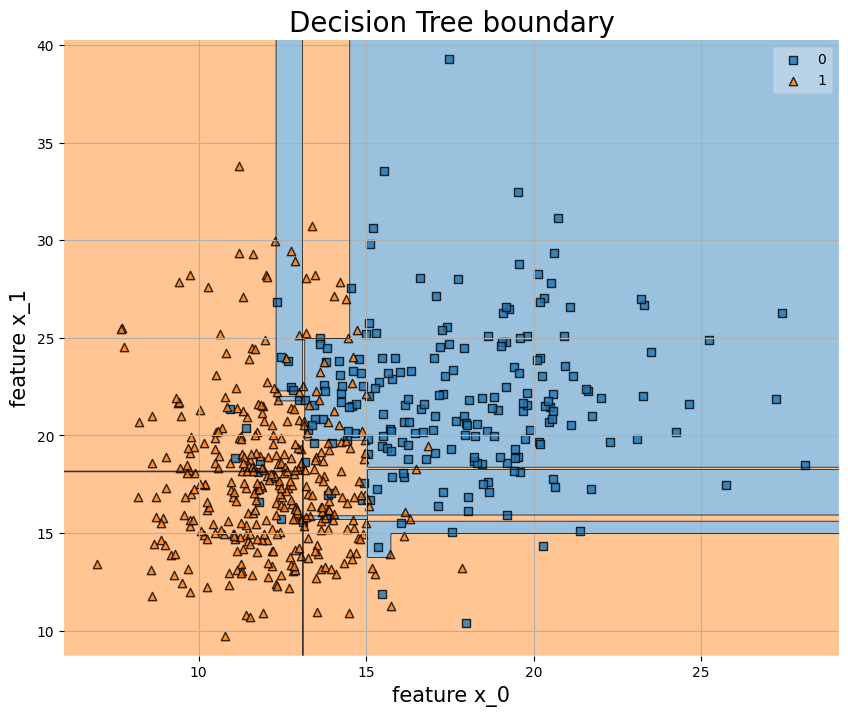

In [4]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.title("Decision Tree boundary", fontsize = 20)
plt.grid()
plt.show()

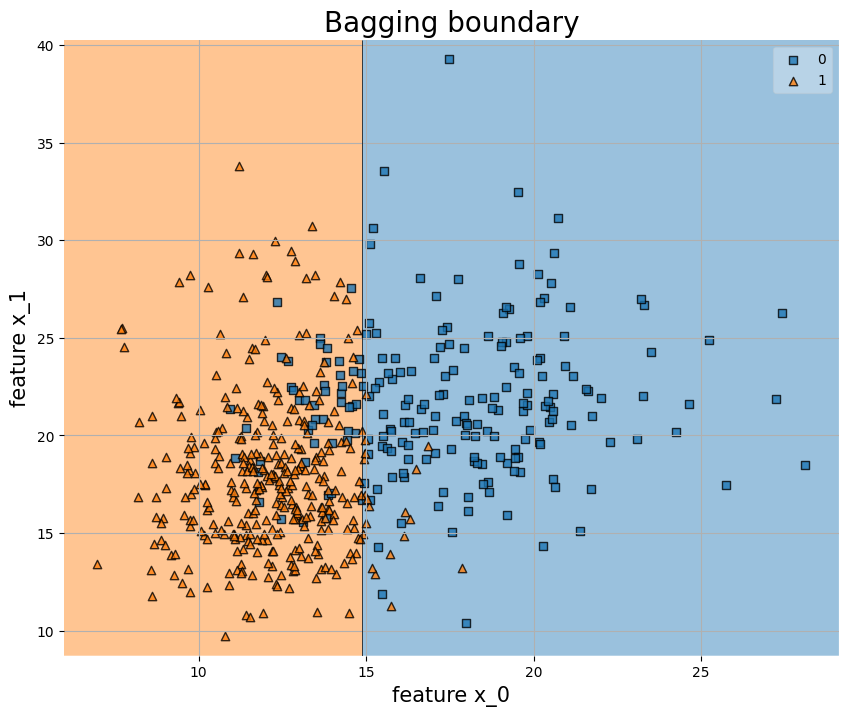

In [5]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.title("Bagging boundary", fontsize = 20)
plt.grid()
plt.show()

### **Random Forest**

- The above bagging model belongs to **Random Forest**. However, we turn to using ```RandomForestClassifier```, which introduces extra randomness when growing tress. Instead of searching for the best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater diversity of trees which results in lower variance of the fit model.

In [6]:
from sklearn.ensemble import RandomForestClassifier

tree_clf = DecisionTreeClassifier(max_depth=1, random_state=1)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1,random_state=1),
                            n_estimators=500,
                            bootstrap=True,
                            n_jobs=-1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")


Tree Classification Report
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        80
           1       0.87      0.97      0.92       148

    accuracy                           0.89       228
   macro avg       0.90      0.85      0.87       228
weighted avg       0.89      0.89      0.88       228
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        80
           1       0.88      0.93      0.90       148

    accuracy                           0.87       228
   macro avg       0.87      0.85      0.86       228
weighted avg       0.87      0.87      0.87       228
 



In [7]:
forest_clf = RandomForestClassifier(max_depth=1, random_state=1,
                                    n_estimators=500,
                                    bootstrap=True,
                                    n_jobs=-1)

forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        80
           1       0.88      0.93      0.90       148

    accuracy                           0.87       228
   macro avg       0.87      0.85      0.86       228
weighted avg       0.87      0.87      0.87       228
 



<span style="color: blue;">As obserbed in the output of the above code cell, the accuracy of the bagging classifier and the random forest are the same.</span>

We can further compare these two models with identical accuracy is to view the decision regions generated by them.

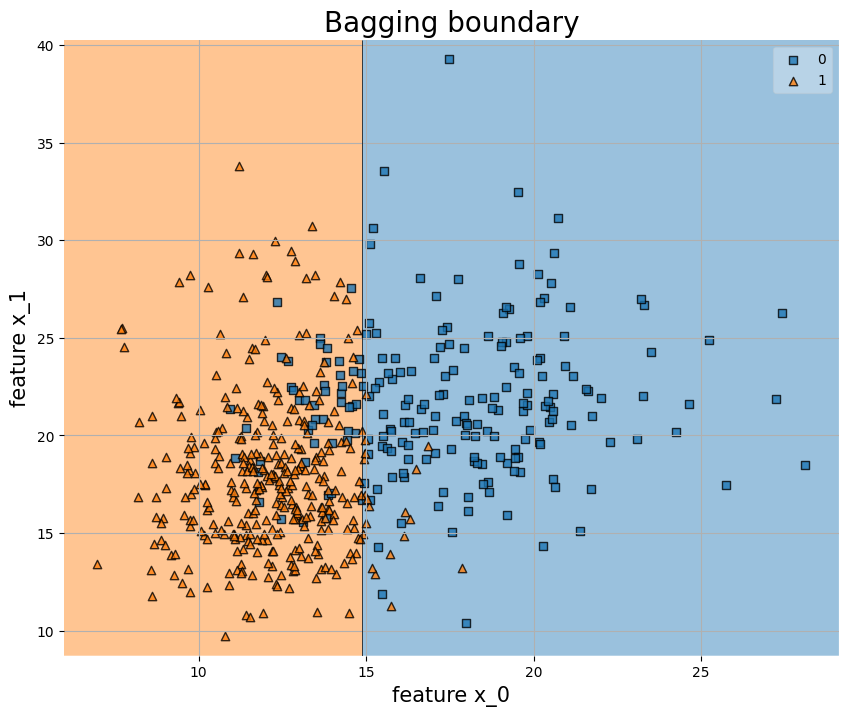

In [8]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.title("Bagging boundary", fontsize = 20)
plt.grid()
plt.show()

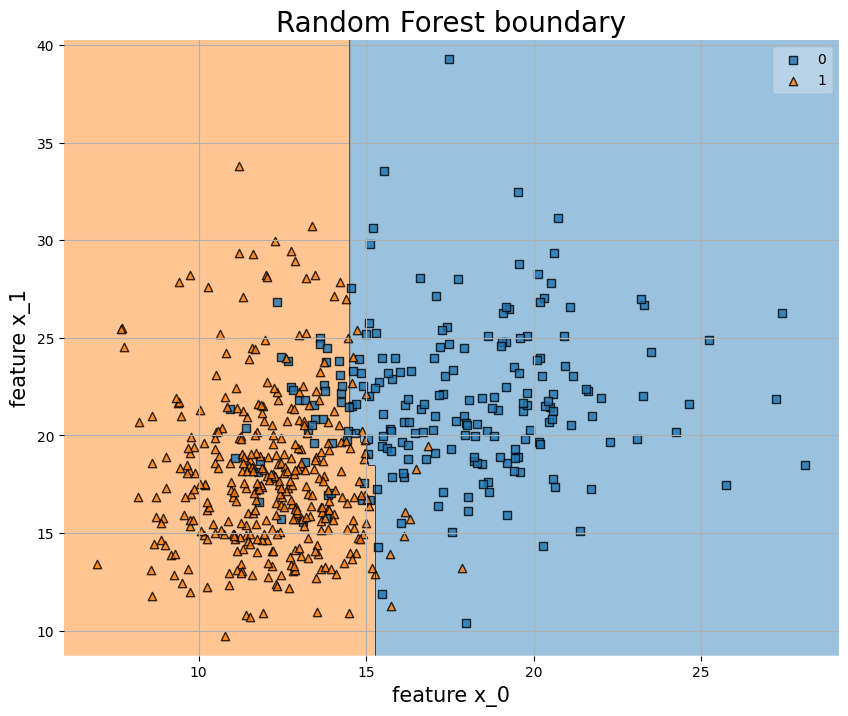

In [9]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.title("Random Forest boundary", fontsize = 20)
plt.grid()
plt.show()

We further consider all the features and compare the three models

In [10]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=1)

tree_clf = DecisionTreeClassifier(max_depth=15, random_state=1)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=15,random_state=1),
                            n_estimators=500,
                            bootstrap=True,
                            n_jobs=-1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        80
           1       0.92      0.95      0.93       148

    accuracy                           0.91       228
   macro avg       0.91      0.90      0.90       228
weighted avg       0.91      0.91      0.91       228
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        80
           1       0.96      0.96      0.96       148

    accuracy                           0.95       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.95      0.95      0.95       228
 



In [11]:
forest_clf = RandomForestClassifier(max_depth=15, random_state=1,
                                    n_estimators=500,
                                    bootstrap=True,
                                    n_jobs=-1)

forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        80
           1       0.96      0.96      0.96       148

    accuracy                           0.95       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.95      0.95      0.95       228
 



<span style="color: blue;">The accuracy of the bagging classifier and the random forest are still the same.</span>

Measure the importance of features

In [12]:
print(forest_clf.feature_importances_)

[0.04414231 0.01383319 0.05219021 0.0425534  0.00455527 0.0079421
 0.05410903 0.07651122 0.00334671 0.00299029 0.01011747 0.00309159
 0.01130024 0.02549556 0.00327044 0.00349279 0.0050873  0.00294909
 0.00320809 0.00428257 0.11540452 0.01573965 0.1593743  0.10491897
 0.0097593  0.01736325 0.03889382 0.15079863 0.00900322 0.00427548]


### **AdaBoost**

- AdaBoost combines multiple weak learners into a single strong learner in a sequential process, adjusting the weights of incorrectly classified instances so that subsequent classifiers focus more on difficult cases

<p align="center">
    <img src="adaboost.png">
</p>

- We continue with the Breast Cancer Wisconsin data.

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

data = load_breast_cancer()

X = data.data[:,:2]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=1),
                             n_estimators=10,
                             algorithm="SAMME.R",
                             learning_rate=0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        80
           1       0.90      0.92      0.91       148

    accuracy                           0.88       228
   macro avg       0.87      0.87      0.87       228
weighted avg       0.88      0.88      0.88       228
 



<span style="color: blue;">AdaBoost performs well with this task.</span>

View the decision boundaries generated by AdaBoost

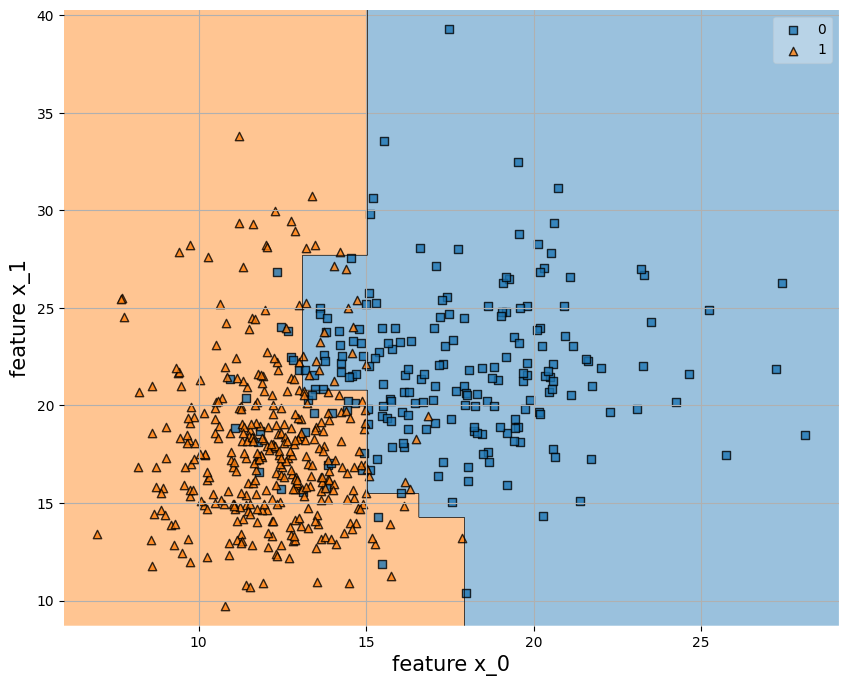

In [14]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

We further use all the features to train an AdaBoost.

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=1),
                             n_estimators=10,
                             algorithm="SAMME.R",
                             learning_rate=0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        80
           1       0.95      0.93      0.94       148

    accuracy                           0.92       228
   macro avg       0.91      0.92      0.91       228
weighted avg       0.92      0.92      0.92       228
 



<span style="color: blue;">AdaBoost performs better than a single decision tree classifier, but performs worse than the bagging and random forest.</span>

### **Gradient Boosting**

- Gradient boosting works by sequentially adding predictors to an ensemble, each correcting is predecessor. The difference between this method and AdaBoost is that gradient boosting tries to fit the new predictor to the **residual errors** made by the previous predictor.

<p align="center">
    <img src="gradient_boosting.png">
</p>

- We continue with the Breast Cancer Wisconsin data.

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

data = load_breast_cancer()

X = data.data[:,:2]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

gb_clf = GradientBoostingClassifier(n_estimators=10, 
                                    learning_rate=0.5, 
                                    max_depth=1, 
                                    random_state=1)
gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict(X_test)
print(f"Gradient Boosting Classification Report")
print(classification_report(y_test, gb_y_pred), "\n")

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        80
           1       0.90      0.93      0.91       148

    accuracy                           0.89       228
   macro avg       0.88      0.87      0.87       228
weighted avg       0.89      0.89      0.89       228
 



<span style="color: blue;">Graident Boosting performs well with the task.</span>

View the decision boundaries generated by Gradient Boosting

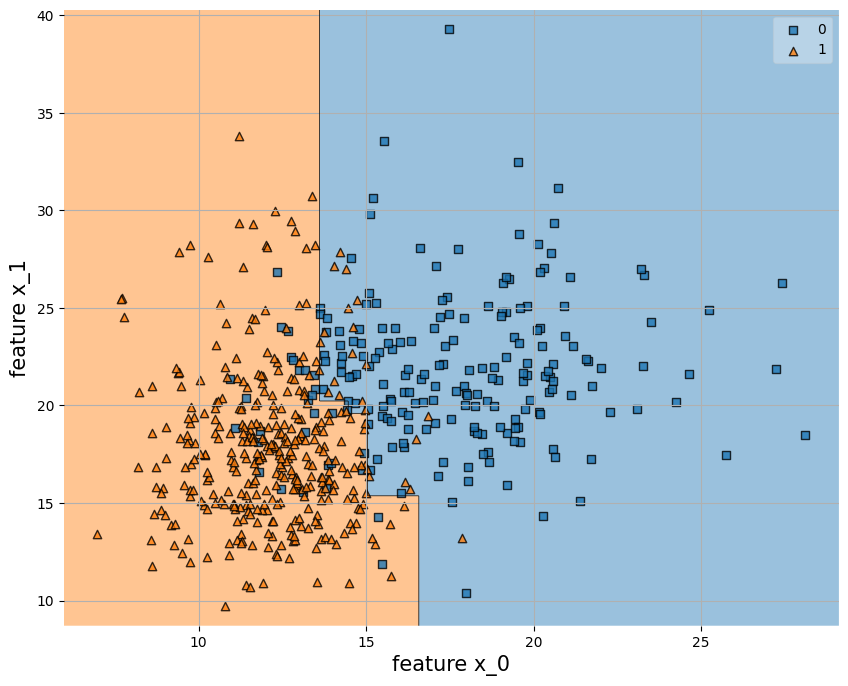

In [17]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = gb_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

We further use all the features to train a Gradient Boosting.

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

gb_clf = GradientBoostingClassifier(n_estimators=10, 
                                    learning_rate=0.5, 
                                    max_depth=1, 
                                    random_state=1)
gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict(X_test)
print(f"Gradient Boosting Classification Report")
print(classification_report(y_test, gb_y_pred), "\n")

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        80
           1       0.95      0.91      0.93       148

    accuracy                           0.91       228
   macro avg       0.90      0.91      0.91       228
weighted avg       0.91      0.91      0.91       228
 



<span style="color: blue;">Gradient Boosting performs well.</span>

---

### Conclusion

In summary, we find that ensemble methods perform better than single contribution models, especially when the number of features trained increases.